In [1]:
import catalogue_analysis as ca
import numpy as np
from astropy.table import join,Table,Column,vstack
from astropy.io import fits
#
# Specify regions to loop over
regions=('S','N')
#
# Read the enhanced BGS catalogue produced by Augment_BGS_cat.ipynb
dat=Table.read('BGS_Y3_A1Q68.fits')
print('Meta data stored with ths table:')
print(dat.meta)
#
# Check selection cuts agree with stored meta data of the sample we have read
Sel=ca.selection('S')
assert dat.meta['FAINT_S'] == Sel['faint'], f"Faint limits do not match: {dat.meta['FAINT_S']} != {Sel['faint']}"
assert dat.meta['BRIGHT_S'] == Sel['bright'], f"Bright limits do not match: {dat.meta['BRIGHT_S']} != {Sel['bright']}"
assert dat.meta['ZMAX_S'] == Sel['zmax'], f"Zmax do not match: {dat.meta['ZMAX_S']} != {Sel['zmax']}"
assert dat.meta['ZMIN_S'] == Sel['zmin'], f"Zmin do not match: {dat.meta['ZMIN_S']} != {Sel['zmin']}"
assert dat.meta['QEVOL_S'] == Sel['Qevol'], f"Qevol do not match: {dat.meta['QEVOL_S']} != {Sel['Qevol']}"
assert dat.meta['AREA_S'] == Sel['area'], f"Areas do not match: {dat.meta['AREA_S']} != {Sel['area']}"
assert dat.meta['F_RAN_S'] == Sel['f_ran'], f"f_ran do not match: {dat.meta['F_RAN_S']} != {Sel['f_ran']}"
assert dat.meta['COL_S'] == Sel['col'], f"Colours do not match: {dat.meta['COL_S']} != {Sel['col']}"
assert dat.meta['STYLE_S'] == Sel['style'], f"Styles do not match: {dat.meta['STYLE_S']} != {Sel['style']}"
Sel=ca.selection('N')
assert dat.meta['FAINT_N'] == Sel['faint'], f"Faint limits do not match: {dat.meta['FAINT_N']} != {Sel['faint']}"
assert dat.meta['BRIGHT_N'] == Sel['bright'], f"Bright limits do not match: {dat.meta['BRIGHT_N']} != {Sel['bright']}"
assert dat.meta['ZMAX_N'] == Sel['zmax'], f"Zmax do not match: {dat.meta['ZMAX_N']} != {Sel['zmax']}"
assert dat.meta['ZMIN_N'] == Sel['zmin'], f"Zmin do not match: {dat.meta['ZMIN_N']} != {Sel['zmin']}"
assert dat.meta['QEVOL_N'] == Sel['Qevol'], f"Qevol do not match: {dat.meta['QEVOL_N']} != {Sel['Qevol']}"
assert dat.meta['AREA_N'] == Sel['area'], f"Areas do not match: {dat.meta['AREA_N']} != {Sel['area']}"
assert dat.meta['F_RAN_N'] == Sel['f_ran'], f"f_ran do not match: {dat.meta['F_RAN_N']} != {Sel['f_ran']}"
assert dat.meta['COL_N'] == Sel['col'], f"Colours do not match: {dat.meta['COL_N']} != {Sel['col']}"
assert dat.meta['STYLE_N'] == Sel['style'], f"Styles do not match: {dat.meta['STYLE_N']} != {Sel['style']}"

# Check cosmology used matches with that used to create the catalogue
assert dat.meta['OM0'] == ca.cosmo.Om0, f"Omega_0 does not match: {dat.meta['OM0']} != {ca.cosmo.Om0}"
assert dat.meta['H0'] == ca.cosmo.H0.value, f"H_0 does not match: {dat.meta['H0']} != {ca.cosmo.H0.value}"
assert dat.meta['TCMB0'] == ca.cosmo.Tcmb0.value, f"Omega_0 does not match: {dat.meta['OM0']} != {ca.cosmo.Tcmb0.value}"

print('Statistics of the data in the table:')
dat.info('stats')

Meta data stored with ths table:
OrderedDict([('EXTNAME', 'LSS'), ('QEVOL_N', 0.68), ('ZMAX_N', 0.6), ('ZMIN_N', 0.002), ('BRIGHT_N', 10.0), ('FAINT_N', 19.54), ('AREA_N', 0.09278121822233744), ('F_RAN_N', 1.0), ('COL_N', 'blue'), ('STYLE_N', 'dashed'), ('QEVOL_S', 0.68), ('ZMAX_S', 0.6), ('ZMIN_S', 0.002), ('BRIGHT_S', 10.0), ('FAINT_S', 19.5), ('AREA_S', 0.2067143725378028), ('F_RAN_S', 1.0), ('COL_S', 'red'), ('STYLE_S', 'solid'), ('H0', 100.0), ('TCMB0', 2.725), ('OM0', 0.313)])
Statistics of the data in the table:
<Table length=7845183>
       name            mean         std         min          max    
------------------ ------------ ----------- ------------ -----------
          TARGETID  3.96297e+16 2.48551e+12  3.96273e+16 3.96374e+16
                 Z     0.213358    0.104274   0.00200098     0.59999
             NTILE      2.42942    0.916613            1           5
                RA      183.119     91.3102  0.000108207         360
               DEC      21.9893     23

In [2]:
# Read one the corresponding Y3 random (It is matched to the orginal clustering catalogue and not yet the cuts made to our sample
fpath='/global/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/test/nonKP/BGS_BRIGHT_7_clustering.ran.fits'
ranfull=ca.Y3load_catalogues(fpath)
ranfull.info('stats')

#Random sample and apply all cuts from the start for a quick run through
Sel=ca.selection('N')# import North selection cuts  
smaskN= (ranfull['Z'] > Sel['zmin']) & (ranfull['Z'] < Sel['zmax']) & (np.random.rand(ranfull['Z'].size)<Sel['f_ran'])\
      & (ranfull['rmag'] < Sel['faint'])  & (ranfull['rmag'] > Sel['bright']) & (ranfull['reg']=='N') 
Sel=ca.selection('S') # import South selection cuts    
smaskS= (ranfull['Z'] > Sel['zmin']) & (ranfull['Z'] < Sel['zmax']) &(np.random.rand(ranfull['Z'].size)<Sel['f_ran']) \
      & (ranfull['rmag'] < Sel['faint'])  & (ranfull['rmag'] > Sel['bright']) & (ranfull['reg']=='S')
smask= np.logical_or(smaskN,smaskS) #True for objects making cuts in North or South
ran=ranfull[smask]    
print('South sample size:',smaskS.sum())
print('North sample size:',smaskN.sum())
ran.info('stats')


<Table length=30890761>
      name           mean        std         min         max    
---------------- ----------- ----------- ----------- -----------
        TARGETID  3.2786e+17 2.48765e+12 3.27858e+17 3.27868e+17
              RA     182.362     93.1026 1.44426e-05         360
             DEC     22.0439     23.2156    -19.5674     79.2522
           NTILE     2.24559    0.944439           1           5
         PHOTSYS          --          --          --          --
FRAC_TLOBS_TILES    0.977861   0.0316573           0           1
               Z    0.213384    0.104274  0.00200098     0.59999
          WEIGHT     1.26497    0.755124           0     68.9124
      WEIGHT_SYS           1           0           1           1
     WEIGHT_COMP     1.29179    0.769686           1          69
    WEIGHT_ZFAIL     1.00127  0.00520768           1     1.19818
   TARGETID_DATA 3.96297e+16 2.48594e+12 3.96273e+16 3.96374e+16
    flux_g_dered     26.5728     94.3445    -72.8934     9805.88
 

In [3]:
# Set up jackknife region limits to equally split up the randoms provided
# and assign unique indices to each region for both data and randoms
njack_S=0
dat['ijack']=-999  # default to mean unassigned
ran['ijack']=-999  # default to mean unassigned
for reg in regions:
    regmask = (dat['reg']==reg)   
    ranregmask = (ran['reg']==reg)  
    print('Processing region ',reg)
    if (reg=='S'):
      # set up the RA and dec boundaries  
      njack_S,limits_S=ca.solve_jackknife_nonsq(ran[ranregmask], ndiv_ra=4, ndiv_dec=5, offset=275)
      # assign randoms to regions
      ca.set_jackknife(ran, ranregmask, limits_S, 0, njack_S)
      # assign data to the same regions
      ca.set_jackknife(dat, regmask, limits_S, 0, njack_S)
    else: 
      # set up the RA and dec boundaries   
      njack_N,limits_N=ca.solve_jackknife_nonsq(ran[ranregmask], ndiv_ra=3, ndiv_dec=3, offset=275)
      # assign randoms to regions
      ca.set_jackknife(ran, ranregmask, limits_N, njack_S, njack_N)
      # assign data to the same regions  
      ca.set_jackknife(dat, regmask, limits_N, njack_S, njack_N)
    

Processing region  S
length of data table: 21321530
assigning 1066077 objects to jackknife region 0
assigning 1066076 objects to jackknife region 1
assigning 1066077 objects to jackknife region 2
assigning 1066076 objects to jackknife region 3
assigning 1066077 objects to jackknife region 4
assigning 1066077 objects to jackknife region 5
assigning 1066076 objects to jackknife region 6
assigning 1066076 objects to jackknife region 7
assigning 1066076 objects to jackknife region 8
assigning 1066077 objects to jackknife region 9
assigning 1066077 objects to jackknife region 10
assigning 1066076 objects to jackknife region 11
assigning 1066076 objects to jackknife region 12
assigning 1066076 objects to jackknife region 13
assigning 1066077 objects to jackknife region 14
assigning 1066077 objects to jackknife region 15
assigning 1066075 objects to jackknife region 16
assigning 1066077 objects to jackknife region 17
assigning 1066076 objects to jackknife region 18
assigning 1066077 objects t

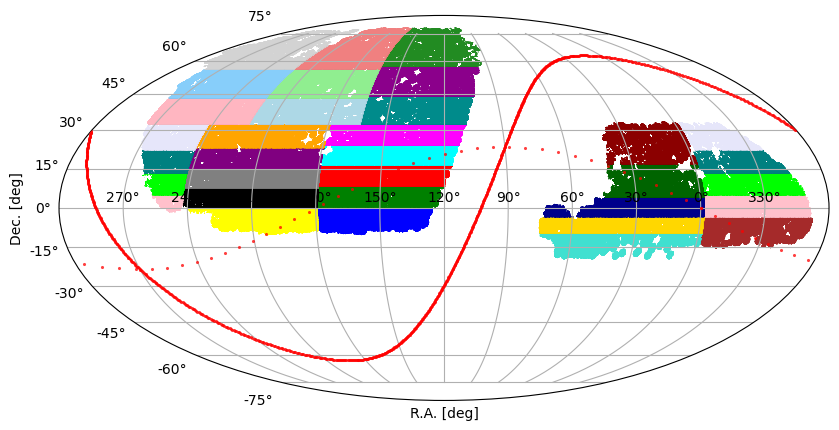

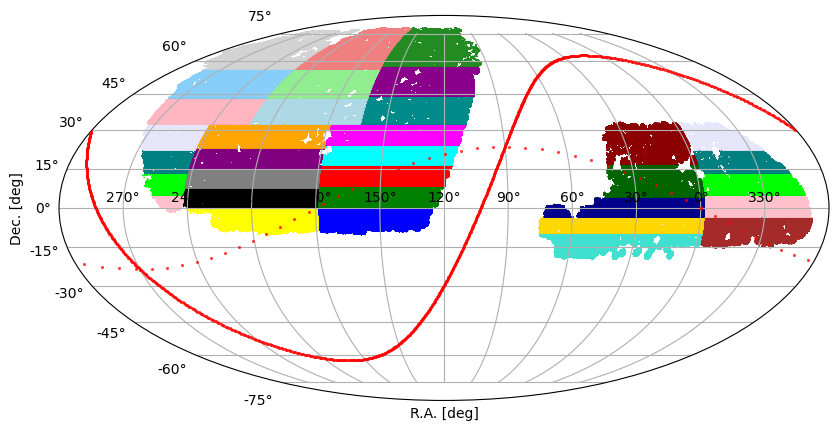

In [4]:
# Visualise the jackknife regions 'Black crosses indicate any unassigned objects'
ca.sky_plot_jack(dat)
ca.sky_plot_jack(ran)

jackknife index range: 0 19
number of jackknife samples: 20  for region: S
jackknife index range: 20 28
number of jackknife samples: 9  for region: N


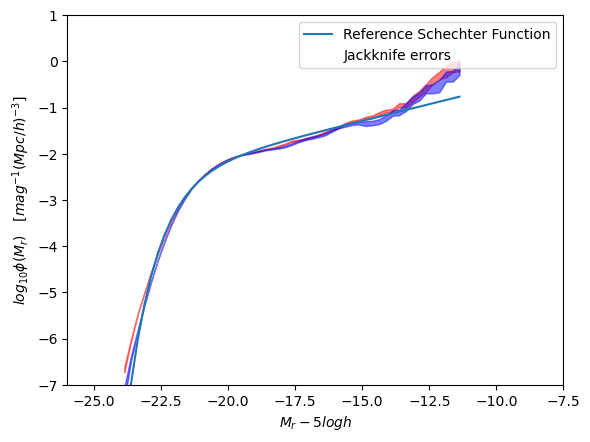

jackknife index range: 0 19
number of jackknife samples: 20  for region: S
jackknife index range: 20 28
number of jackknife samples: 9  for region: N


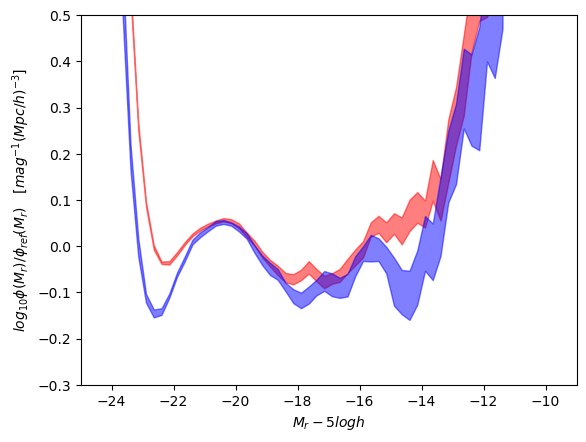

In [5]:
#1/Vmax LF estimate
log_phi_vmax,log_phi_low,log_phi_hi,magbins=ca.lumfun_vmax(dat,regions,ratio=False)
#1/Vmax LF estimate
log_phi_vmax,log_phi_low,log_phi_hi,magbins=ca.lumfun_vmax(dat,regions,ratio=True)

Selecting:  -18.0 >M-5log h> -17.0 labelled:  Mag:-17.0:-18.0S
Selecting:  -19.0 >M-5log h> -18.0 labelled:  Mag:-18.0:-19.0S
Selecting:  -20.0 >M-5log h> -19.0 labelled:  Mag:-19.0:-20.0S
Selecting:  -21.0 >M-5log h> -20.0 labelled:  Mag:-20.0:-21.0S
Selecting:  -22.0 >M-5log h> -21.0 labelled:  Mag:-21.0:-22.0S
Selecting:  -23.0 >M-5log h> -22.0 labelled:  Mag:-22.0:-23.0S
Selecting:  -18.0 >M-5log h> -17.0 labelled:  Mag:-17.0:-18.0N
Selecting:  -19.0 >M-5log h> -18.0 labelled:  Mag:-18.0:-19.0N
Selecting:  -20.0 >M-5log h> -19.0 labelled:  Mag:-19.0:-20.0N
Selecting:  -21.0 >M-5log h> -20.0 labelled:  Mag:-20.0:-21.0N
Selecting:  -22.0 >M-5log h> -21.0 labelled:  Mag:-21.0:-22.0N
Selecting:  -23.0 >M-5log h> -22.0 labelled:  Mag:-22.0:-23.0N


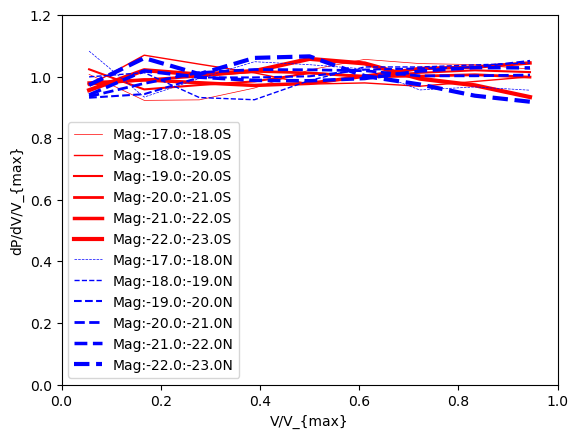

In [6]:
import matplotlib.pyplot as plt
# Inspect V/Vmax distributions of subsets
binv = np.linspace(0, 1.0,10)
bin_cen=(binv[:-1] + binv[1:]) / 2.0
for reg in regions:
    Sel=ca.selection(reg) # define selection parameters for this region
    ilab=0
    for Magb in np.linspace(-18.0,-23.0,6):
        Magf=Magb+1.0
        ilab=ilab+1
        label="Mag:"+"{:.1f}".format(Magf)+":"+"{:.1f}".format(Magb)+reg
        print('Selecting: ',Magb,'>M-5log h>',Magf,'labelled: ',label)
        mask=(dat['ABSMAG_RP1']>Magb) & (dat['ABSMAG_RP1']<Magf) & (dat['reg']==reg) #Absolute Magnitude slice
        v_vmax=dat['v'][mask]/dat['vmax'][mask]
        wcount,_=np.histogram(v_vmax, bins=binv,  density=True, weights=dat[mask]['WEIGHT'])
        plt.plot(bin_cen, wcount, label=label, color=Sel['col'], linestyle=Sel['style'], linewidth=0.5*ilab)
plt.xlabel('V/V_{max}')
plt.ylabel('dP/dV/V_{max}')
plt.xlim([0,1.0])
plt.ylim([0,1.2])
plt.legend()
plt.show()

All: S z range: 0.0020025305144170343 0.5999902958289864
Selected: S z range: 0.0020025305144170343 0.5999902958289864
All: S rmag range: 12.000327 19.499998
Selected: S rmag range: 12.000327 19.499998
All: N z range: 0.0020009781304771183 0.5999337821694386
Selected: N z range: 0.0020009781304771183 0.5999337821694386
All: N rmag range: 12.024025 19.539999
Selected: N rmag range: 12.024025 19.539999


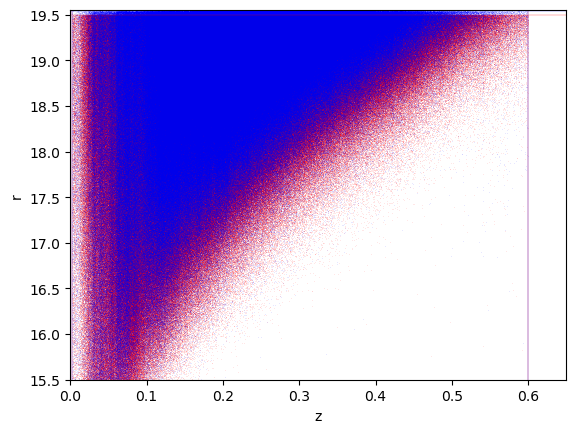

In [7]:
#apparent mag redshift distributions
ca.plot_mag_z(dat,regions,contours=False)

In [8]:
#SWML LF estimate normalized to that of the initial guess
#log_phi_swml,magbins=ca.lumfun_swml(dat,regions,log_phi_vmax,magbins)

Selecting:  0.0 <z< 0.1 labelled:  Z:0.0:0.1S
jackknife index range: 0 19
number of jackknife samples: 20  for region: S


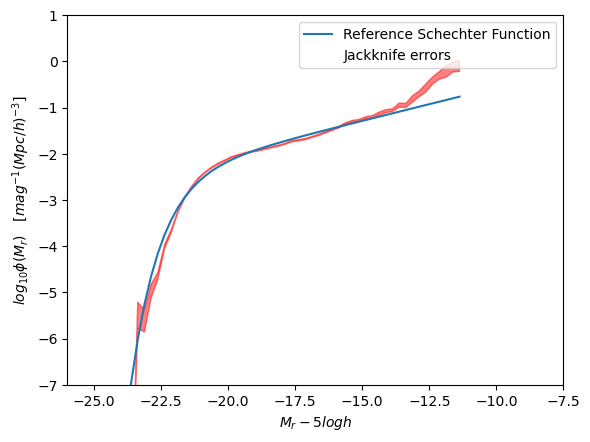

Selecting:  0.1 <z< 0.2 labelled:  Z:0.1:0.2S
jackknife index range: 0 19
number of jackknife samples: 20  for region: S


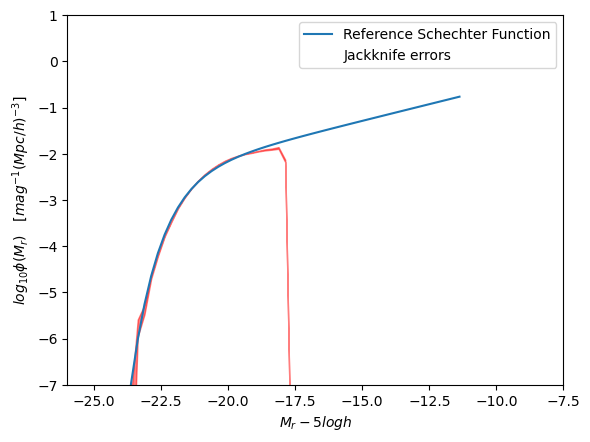

Selecting:  0.2 <z< 0.30000000000000004 labelled:  Z:0.2:0.3S
jackknife index range: 0 19
number of jackknife samples: 20  for region: S


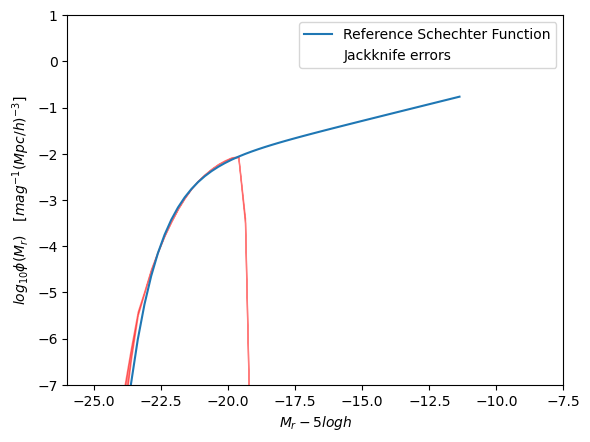

Selecting:  0.30000000000000004 <z< 0.4 labelled:  Z:0.3:0.4S
jackknife index range: 0 19
number of jackknife samples: 20  for region: S


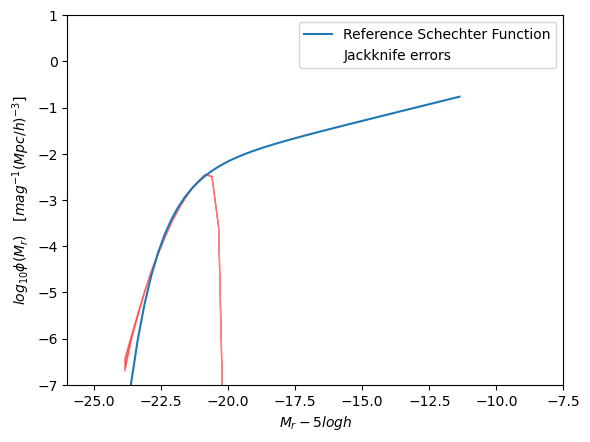

Selecting:  0.4 <z< 0.5 labelled:  Z:0.4:0.5S
jackknife index range: 0 19
number of jackknife samples: 20  for region: S


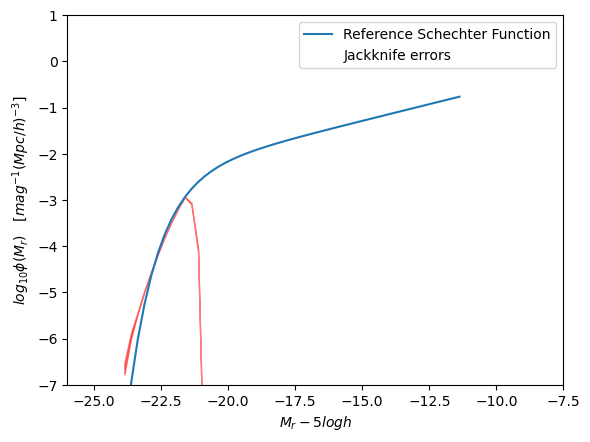

Selecting:  0.5 <z< 0.6 labelled:  Z:0.5:0.6S
jackknife index range: 0 19
number of jackknife samples: 20  for region: S


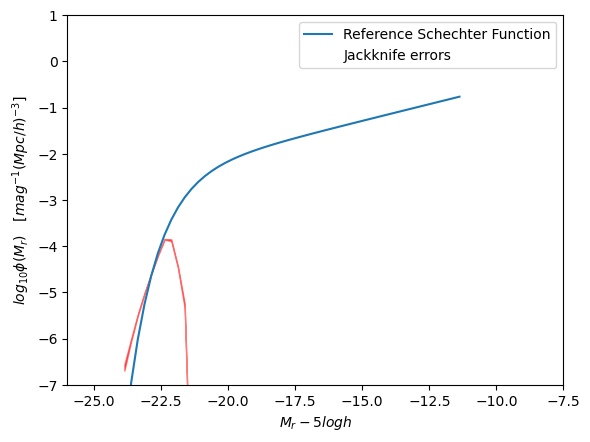

Selecting:  0.0 <z< 0.1 labelled:  Z:0.0:0.1N
jackknife index range: 20 28
number of jackknife samples: 9  for region: N


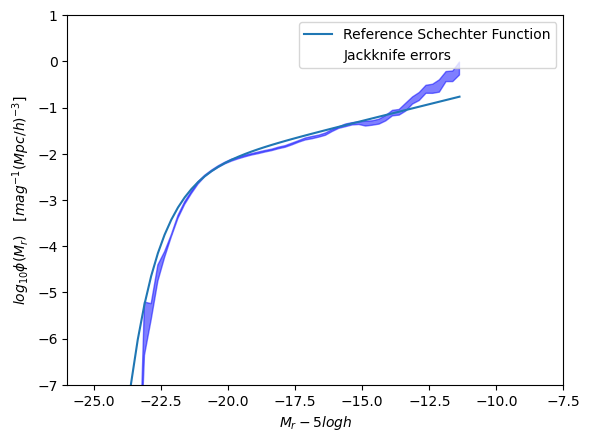

Selecting:  0.1 <z< 0.2 labelled:  Z:0.1:0.2N
jackknife index range: 20 28
number of jackknife samples: 9  for region: N


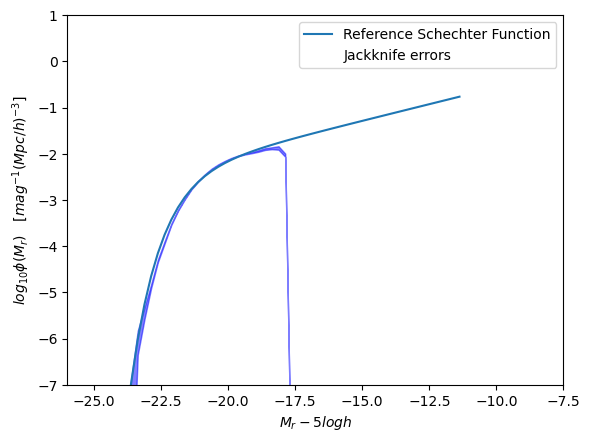

Selecting:  0.2 <z< 0.30000000000000004 labelled:  Z:0.2:0.3N
jackknife index range: 20 28
number of jackknife samples: 9  for region: N


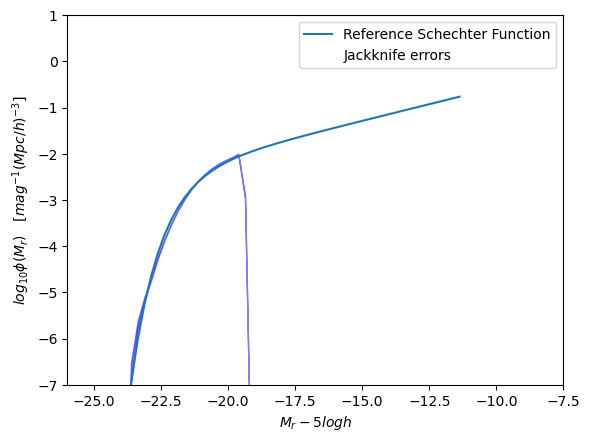

Selecting:  0.30000000000000004 <z< 0.4 labelled:  Z:0.3:0.4N
jackknife index range: 20 28
number of jackknife samples: 9  for region: N


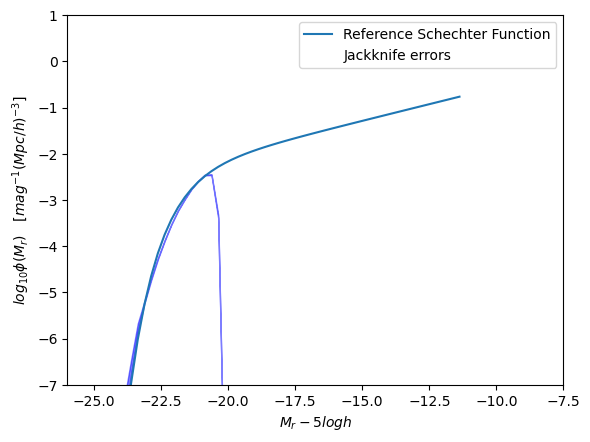

Selecting:  0.4 <z< 0.5 labelled:  Z:0.4:0.5N
jackknife index range: 20 28
number of jackknife samples: 9  for region: N


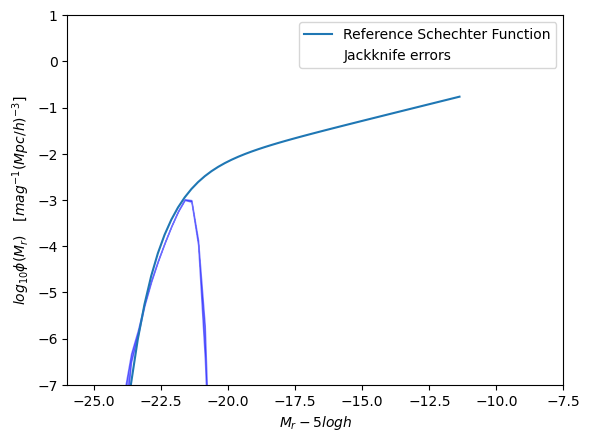

Selecting:  0.5 <z< 0.6 labelled:  Z:0.5:0.6N
jackknife index range: 20 28
number of jackknife samples: 9  for region: N


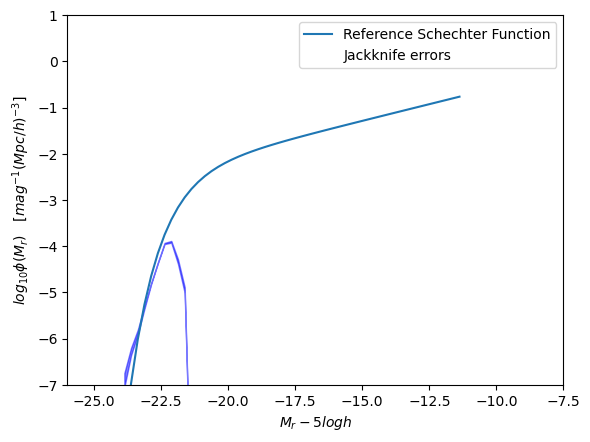

<Table length=51>
       name         mean     std     min      max    
----------------- -------- ------- ------- ----------
              Mag  -17.625  3.6799 -23.875    -11.375
   Z:0.0:0.1S_phi -2.22715  2.0083     -10  -0.085624
Z:0.0:0.1S_phi_lo -2.27532 2.01997     -10  -0.216091
Z:0.0:0.1S_phi_hi -2.18995 2.00629     -10  0.0145694
   Z:0.1:0.2S_phi -6.73139 3.60618     -10   -1.87454
Z:0.1:0.2S_phi_lo -6.79088 3.62607     -10   -1.89339
Z:0.1:0.2S_phi_hi -6.71634 3.61141     -10   -1.85649
   Z:0.2:0.3S_phi -7.60864    3.23     -10   -2.06691
Z:0.2:0.3S_phi_lo -7.62251 3.22389     -10   -2.07612
Z:0.2:0.3S_phi_hi -7.59901  3.2358     -10   -2.05789
   Z:0.3:0.4S_phi -8.21141  2.8546     -10   -2.43782
Z:0.3:0.4S_phi_lo  -8.2178 2.84873     -10   -2.44331
Z:0.3:0.4S_phi_hi -8.20602 2.85995     -10   -2.43238
   Z:0.4:0.5S_phi -8.67252  2.4557     -10   -2.93499
Z:0.4:0.5S_phi_lo -8.67881 2.44801     -10    -2.9419
Z:0.4:0.5S_phi_hi -8.66716 2.46261     -10   -2.92819
   Z:0.5:0

In [9]:
#Estimate LFs for different redshift slices and put them all in one table
LFs=Table()
for reg in regions:
    Sel=ca.selection(reg) # define selection parameters for this region
    for zmin_sub in np.linspace(0.0,0.5,6):
        zmax_sub=zmin_sub+0.1
        label="Z:"+"{:.1f}".format(zmin_sub)+":"+"{:.1f}".format(zmax_sub)+reg
        print('Selecting: ',zmin_sub,'<z<',zmax_sub,'labelled: ',label)
        datsub=ca.redhsift_slice(dat,zmin_sub,zmax_sub)
        #ca.plot_mag_z(datsub,regions,contours=False)
        log_phi_vmax,log_phi_lo,log_phi_hi,magbins=ca.lumfun_vmax(datsub,reg,ratio=False)
        LFs['Mag']=magbins
        LFs[label+'_phi']=log_phi_vmax
        LFs[label+'_phi_lo']=log_phi_lo
        LFs[label+'_phi_hi']=log_phi_hi

LFs.info('stats')

In [ ]:
import matplotlib.pyplot as plt
njack=2
#Replot all LFs on single plot
bin_cen=LFs['Mag']   
# Reference Schehcter function from Sam's draft paper Table 1
phi_star=10.0**(-2.13)
alpha=-1.36
mstar=-21.10
l_lstar= 10.0**(0.4*(-bin_cen+mstar))
phi_sch= phi_star * l_lstar**(1.0+alpha) * np.exp(-l_lstar) *(np.log(10.0)/2.5)
log_phi_sch = np.log10(phi_sch)

for reg in regions:
   Sel=ca.selection(reg)
   for zmin_sub in np.linspace(0.0,0.5,6):
       zmax_sub=zmin_sub+0.1
       label="Z:"+"{:.1f}".format(zmin_sub)+":"+"{:.1f}".format(zmax_sub)+reg
       plt.fill_between(LFs['Mag'],LFs[label+'_phi_lo'],LFs[label+'_phi_hi'],color=Sel['col'],alpha=0.5)
plt.plot(bin_cen,log_phi_sch, label='Reference Schechter Function')
plt.xlabel('$M_r - 5 log h$')
plt.ylabel('$log_{10} \phi(M_r)\quad  [mag^{-1} (Mpc/h)^{-3}]$')
plt.xlim([-26,-7.5])
plt.ylim([-7,1.0])
plt.legend()
plt.show()

# Replot relative to reference
for reg in regions:
   Sel=ca.selection(reg)
   for zmin_sub in np.linspace(0.0,0.5,6):
       zmax_sub=zmin_sub+0.1
       label="Z:"+"{:.1f}".format(zmin_sub)+":"+"{:.1f}".format(zmax_sub)+reg
       
       plt.fill_between(LFs['Mag'],LFs[label+'_phi_lo']-log_phi_sch,LFs[label+'_phi_hi']-log_phi_sch,color=Sel['col'],alpha=0.5)
plt.xlabel('$M_r - 5 log h$')
plt.ylabel('$log_{10} \phi(M_r)/\phi_{ref}(M_r) \quad  [mag^{-1} (Mpc/h)^{-3}]$')
plt.xlim([-24,-18])
plt.ylim([-0.3,+0.5])
plt.show()


# Replot without error bands
for reg in regions:
   Sel=ca.selection(reg)
   for zmin_sub in np.linspace(0.0,0.5,6):
       zmax_sub=zmin_sub+0.1
       label="Z:"+"{:.1f}".format(zmin_sub)+":"+"{:.1f}".format(zmax_sub)+reg
       mask=(LFs[label+'_phi']>-9.0)
       plt.plot(LFs['Mag'][mask],LFs[label+'_phi'][mask]-log_phi_sch[mask],color=Sel['col'],alpha=0.5)
plt.xlabel('$M_r - 5 log h$')
plt.ylabel('$log_{10} \phi(M_r)/\phi_{ref}(M_r) \quad  [mag^{-1} (Mpc/h)^{-3}]$')
plt.xlim([-24,-18])
plt.ylim([-0.3,+0.5])
plt.title('Q='+"{:.2f}".format(Sel['Qevol']), loc = 'left')
plt.show()
  

In [ ]:
# Form cumulative LFs and replot with axes reversed
# intepolate to unifornm gird in log(phi-cuml)
dMag=LFs['Mag'][1]-LFs['Mag'][0]
print('Magnitude bin width:',dMag)
logphi_bin=np.linspace(-7.0,-1.5,30)
for reg in regions:
   Sel=ca.selection(reg)
   for zmin_sub in np.linspace(0.0,0.5,6):  
       zmax_sub=zmin_sub+0.1
       label="Z:"+"{:.1f}".format(zmin_sub)+":"+"{:.1f}".format(zmax_sub)+reg
       log_phi_cuml= np.log10(np.cumsum((10.0**LFs[label+'_phi']))*dMag) # cumulative luminosity to faintest bin edge
       Mag_ofn=np.interp(logphi_bin,log_phi_cuml,LFs['Mag']) # interpolate to get the magintude at a set of cumulative number densities
       plt.plot(log_phi_cuml,LFs['Mag'],color=Sel['col'],alpha=0.5) # plot the cumulative LFs
       plt.plot(logphi_bin,Mag_ofn,color=Sel['col'],alpha=0.5,linestyle='dotted') # plot the interpolated versions
       mask=(LFs[label+'_phi']>-9.0)
       #plt.plot(LFs[label+'_phi'][mask],LFs['Mag'][mask],color=Sel['col'],alpha=0.5)
plt.xlabel('$log_{10}\ \phi_{cuml} $')
plt.ylabel('$M_r - 5 log h$')
plt.ylim([-24,-18])
plt.xlim([-7.0,+0.0])
plt.title('Q='+"{:.2f}".format(Sel['Qevol']), loc = 'left')
plt.show()


# Plot magnitude difference compared to lowest redshift reference sample at each number density
cols=('b','g','c','m','r','k','y')
zs=np.array([0.05,0.15,0.25,0.35,0.45,0.55])
plt.plot(zs,offs)
offs=0.1 - 0.7*(zs-0.1) + 1.4*(zs-0.1)**2
#offs=np.array([0.15,0.1,0.008,0.015,0.03,0.06])
for reg in regions:
   Sel=ca.selection(reg)
   zmin_sub=0.1
   zmax_sub=zmin_sub+0.1
   label="Z:"+"{:.1f}".format(zmin_sub)+":"+"{:.1f}".format(zmax_sub)+reg
   log_phi_cuml= np.log10(np.cumsum((10.0**LFs[label+'_phi']))*dMag) # cumulative luminosity to faintest bin edge
   Mag_ofn_ref=np.interp(logphi_bin,log_phi_cuml,LFs['Mag']) # interpolate to get the magintude at a set of cumulative number densities 
   icol=-1
   for zmin_sub in np.linspace(0.0,0.5,6):
       zmax_sub=zmin_sub+0.1
       label="Z:"+"{:.1f}".format(zmin_sub)+":"+"{:.1f}".format(zmax_sub)+reg
       icol=icol+1
       print(label,'colour:',cols[icol])
       log_phi_cuml= np.log10(np.cumsum((10.0**LFs[label+'_phi']))*dMag) # cumulative luminosity to faintest bin edge
       Mag_ofn=np.interp(logphi_bin,log_phi_cuml,LFs['Mag']) # interpolate to get the magintude at a set of cumulative number densities
       DMag_ofn=Mag_ofn-Mag_ofn_ref
       plt.plot(logphi_bin,DMag_ofn-offs[icol],linestyle=Sel['style'],color=cols[icol],alpha=0.5) # Magnitude difference at fixed log(phi_cuml) relative to reference
plt.xlabel('$log_{10}\ \phi_{cuml} $')
plt.ylabel('$\Delta M_r$')
plt.ylim([-0.5,0.5])
plt.xlim([-7.0,+0.0])
plt.title('Q='+"{:.2f}".format(Sel['Qevol']), loc = 'left')
plt.show()


In [ ]:
zs=np.array([0.05,0.15,0.25,0.35,0.45,0.55])
plt.plot(zs,offs)
off=0.1 - 0.7*(zs-0.1) + 1.4*(zs-0.1)**2
plt.plot(zs,off)
plt.xlabel('z')
plt.ylabel('$\Delta M_r$')
plt.ylim([-0.5,0.5])
plt.xlim([0.0,+0.6])
plt.show()


## 